## **Natural Language Processing**
# **PART 1**

**• DOMAIN:** Digital content and entertainment industry

**• CONTEXT:**

The objective of this project is to build a text classification model that analyses the customer's sentiments based on their reviews in the IMDB database. The model uses a complex deep learning model to build an embedding layer followed by a classification algorithm to analyse the sentiment of the customers.

**• DATA DESCRIPTION:**

The Dataset of 50,000 movie reviews from IMDB, labelled by
sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, the words are indexed by their frequency in the dataset, meaning the for that has index 1 is the most frequent word. Use the first 20 words from each review to speed up training, using a max vocabulary size of 10,000. As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.


**• OBJECTIVE**:

Build a sequential NLP classifier which can use input text
parameters to determine the customer sentiments.

**• Steps and tasks:**
1. Import and analyse the data set.
Hint: - Use `imdb.load_data()` method
  - Get train and test set
  - Take 10000 most frequent words
2. Perform relevant sequence padding on the data
3. Perform following data analysis:
• Print shape of features and labels
• Print value of any one feature and it's label
4. Decode the feature value to get original sentence
5. Design, train, tune and test a sequential model.

Hint: The aim here Is to import the text, process it such a way that it can be taken as an inout to the ML/NN
classifiers. Be analytical and experimental here in trying new approaches to design the best model.
6. Use the designed model to print the prediction on any one sample.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Import necessary Libraries**

In [ ]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.8.0'

In [ ]:
from tensorflow import keras
from keras.datasets import imdb
from keras.preprocessing import sequence

from keras.models import Sequential
from keras.layers import Dense

from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

from keras.layers.embeddings import Embedding
from keras.layers import Flatten
from keras.callbacks import EarlyStopping


import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **1. Import and analyse the data set.**

Hint: - Use `imdb.load_data()` method


In [ ]:
df_imdb = pd.read_csv('/content/drive/MyDrive/AIML-GL/Natural Language Processing/PROJECT 2 NLP/IMDB Dataset.csv')

In [ ]:
df_imdb.shape

(50000, 2)

In [ ]:
df_imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df_imdb.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


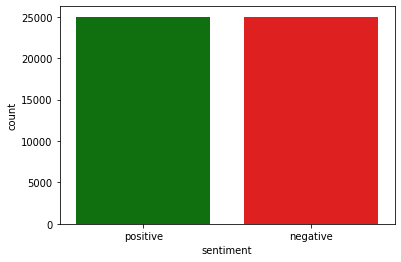

In [ ]:
sns.countplot(df_imdb['sentiment'],palette=["green","red"])

In [ ]:
df_imdb['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

### **We see that the number of positive and negative comments is equal.**

**We convert our sentiment property to int values.**

positive --> 1
negative --> 0

In [ ]:
df_imdb.sentiment = [ 1 if each == "positive" else 0 for each in df_imdb.sentiment]

In [ ]:
df_imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


### **Generating word frequencies**
Let's first generate a frequency table of all the words present in all the reviews combined.

In [ ]:
def gen_freq(text):
    #will store all the words in list
    words_list = []

    #Loop over all the words and extract word from list
    for word in text.split():
        words_list.extend(word)

    #Generate word frequencies using value counts in word_list
    word_freq = pd.Series(words_list).value_counts()

    #print top 100 words
    word_freq[:100]

    return word_freq

In [ ]:
freq = gen_freq(df_imdb.review.str)
freq

the                568735
a                  306960
and                301919
of                 283625
to                 261850
                    ...  
"Mithi/Mithali"         1
(Konkona)               1
"Prof.Anu"              1
(Shabhana               1
Yosemite.<br            1
Length: 438729, dtype: int64

**Create Word clouds**

Word cloud using word frequencies

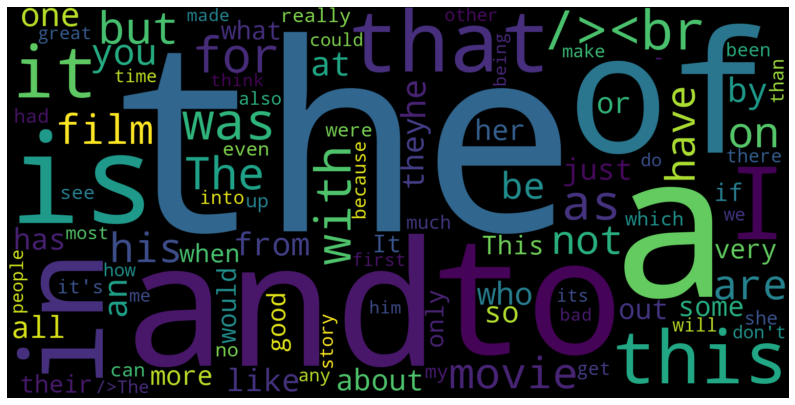

In [ ]:
#Import library WordCloud
from wordcloud import WordCloud

#Generate word cloud
wc = WordCloud(width=1600, height=800, max_words=100).generate_from_frequencies(freq)

plt.figure(figsize=(14,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### **Word cloud using positive reviews**

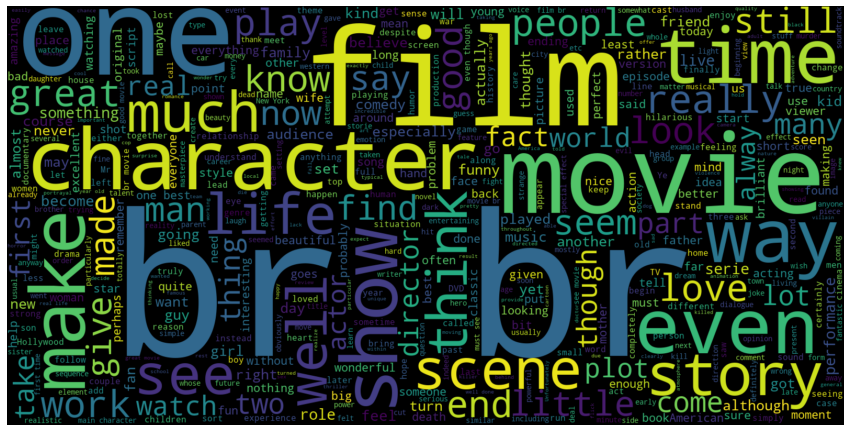

In [ ]:
plt.figure(figsize = (15,15))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(df_imdb[df_imdb.sentiment == 1].review))

plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

### **2. Perform relevant sequence padding on the data**

### **Text Cleaning**
- process of clearing punctuation marks in data
- cleaning unnecessary marks in data.
- capitalization to lowercase.
- cleaning extra spaces.
- removal of stopwords in sentences.

### **Removing Stopwords**

**Removal of stopwords**

Stopwords are commonly occuring words in a language like 'the', 'a' and so on. They can be removed from the text most of the times, as they don't provide valuable information for downstream analysis. In cases like Part of Speech tagging, we should not remove them as provide very valuable information about the POS.


These stopword lists are already compiled for different languages and we can safely use them. For example, the stopword list for english language from the nltk package can be seen below.

In [ ]:
import nltk
nltk.download('stopwords')
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk.corpus import stopwords

stop_word_list = stopwords.words('english')

In [ ]:
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer

In [ ]:
#Tokenization of text
tokenizer=ToktokTokenizer()

In [ ]:
#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stop_word_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stop_word_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
#Apply function on review column
df_imdb['review']= df_imdb['review'].apply(remove_stopwords)

**Sample text after removing stopwords**

In [ ]:
df_imdb['review'][:2]

0    One reviewers mentioned watching 1 Oz episode ...
1    wonderful little production. <br / ><br / >The...
Name: review, dtype: object

**clearing punctuation & unnecessary marks**

In [ ]:

df_imdb['review'] = df_imdb['review'].apply(lambda x: re.sub('[,\.!?:()"]', '', x))
df_imdb['review'] = df_imdb['review'].apply(lambda x: re.sub('[^a-zA-Z"]', ' ', x))

#convert to lowercase
df_imdb['review'] = df_imdb['review'].apply(lambda x: x.lower())

#cleaning extra spaces
df_imdb['review'] = df_imdb['review'].apply(lambda x: x.strip())

In [ ]:
df_imdb_copy = df_imdb.copy() # Creating a copy of dataset after text cleaning

In [ ]:
df_imdb.head()

,review,sentiment
0,one reviewers mentioned watching oz episode ...,1
1,wonderful little production br br the ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically family little boy jake thinks ...,0
4,petter mattei love time money visually stu...,1


In [ ]:
sentiment = df_imdb['sentiment'].values
sentiment

array([1, 1, 1, ..., 0, 0, 0])

**Seperating Features and labels for building a Model.**

In [ ]:
data= df_imdb['review']

- **Get train and test set**
- **Take 10000 most frequent words**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(data)

In [ ]:
# Selecting most frequent 10000 words
data_imdb = data[:10000]

In [ ]:
data_imdb.shape

(10000,)

In [ ]:
sentiment= df_imdb['sentiment'].head(10000)

### **3. Perform following data analysis:**

• Print shape of features and labels

• Print value of any one feature and it's label

### **Perform Train Test Split**

Use 80 % data for training and 20% for testing

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_imdb,sentiment,test_size = 0.2, random_state = 12)

In [ ]:
x_train.shape

(8000,)

In [ ]:
x_test.shape

(2000,)

In [ ]:
# Bring the comments to the same size as the comments of different lengths cannot train the model.

x_train_tokens = tokenizer.texts_to_sequences(x_train)
x_test_tokens = tokenizer.texts_to_sequences(x_test)

In [ ]:
#Then we take the word count of each of our sentences in our data and create a list.

num_tokens = [len(tokens) for tokens in x_train_tokens + x_test_tokens]
num_tokens = np.array(num_tokens)

In [ ]:
num_tokens[:5]

array([182,  80, 135, 356,  84])

In [ ]:
#Here, when setting the number of tokens, a number is determined by taking into account the variability around the average.

max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

280

In [ ]:
#Let's checke percentage of the data covered by using max tokens.

np.sum(num_tokens < max_tokens) / len(num_tokens)

0.9439

In [ ]:
# Performing sequence padding on the tokenized train and test data

x_train_pad = pad_sequences(x_train_tokens, maxlen=max_tokens)
x_test_pad = pad_sequences(x_test_tokens, maxlen=max_tokens)

**Let's check shape of features -Training data**

In [ ]:
print("The shape of features is: ", x_train_pad.shape)

The shape of features is:  (8000, 280)


In [ ]:
print("The shape of features in test data is: ", x_test_pad.shape)

The shape of features in test data is:  (2000, 280)


**Let's check shape of labels -Training data**

In [ ]:
print("The shape of labeles is: ", y_train.shape)

The shape of labeles is:  (8000,)


In [ ]:
print("The shape of labeles in test data is: ", y_test.shape)

The shape of labeles in test data is:  (2000,)


**• Print value of any one feature and it's label**

In [ ]:
# the value of the feature at index 9 and it's corresponding label
import textwrap
train_s= textwrap.fill(x_train[9],90)
print("The sample review : ",train_s)

if y_train[9] == 1:
  print("The original review label is : positive")
else:
  print("The original review label is : negative")

The sample review :  like original gut wrenching laughter like movie young old love movie  hell even mom liked
it br     br    great camp
The original review label is : positive


### **4.** **Decode the feature value to get original sentence**

**We write a function to revert the sentences that we have made int.**

In [ ]:
idx = tokenizer.word_index
inverse_map = dict(zip(idx.values(), idx.keys()))

def return_to_sentence(tokens):
    words = [inverse_map[token] for token in tokens if token!=0]
    text = ' '.join(words)
    return text

In [ ]:
#Original comment
import textwrap
train_sa= textwrap.fill(return_to_sentence(x_train_pad[9]),90)
print("The decoded review : ",train_sa)

The decoded review :  thought would finish whole year without giving single movie bomb rating friend brought
notorious turd house last night feared worst knowing reputation god awful anticipated
mexican made mess dubbed english produced k gordon murray got terrible sets effects
features rather frightening santa operate north pole instead cloud outer space little
helping make toys rather different groups children practically every country is opening
sequence st nick chuckles heartily showing working hard singing terrible holiday songs
variety languages seems go forever story obviously santa claus observe child labor laws br
br eventually get nasty red suited devil traveling hell earth make little kids naughty
turn santa christmas eve rounds nightmare watching movie twisted experience bound little
children turn santa claus holidays forever oddly name jesus christ mentioned often
christmas film somehow makes context bizarre things going on easily makes personal list
worst movie ever seen 

In [ ]:
#token equivalent of comment
print(x_train_pad[9])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0   94    9 1282  121  185  108
  631  577    2 1858  562  311  719 3187 6311  212  134  201 8910  144
 1227 2542  390  262 7336 2481   22  844 2095  495  922 1397 2118 3673
   93  267  621  181  806  146 2510 2620 8515 2059 6295  193 7061 3168
  615   44 2766   23 4732  146  172 3807  298 2326   76  535  501  503
  598 

### **5**. **Design, train, tune and test a sequential model.**

## **LSTM Model**

It is special kind of recurrent neural network that is capable of learning long term dependencies in data. This is achieved because the recurring module of the model has a combination of four layers interacting with each other.

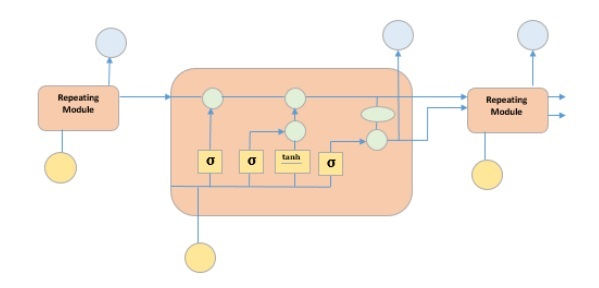

**Neural Network**

The picture above depicts four neural network layers in yellow boxes, point wise operators in green circles, input in yellow circles and cell state in blue circles. An LSTM module has a cell state and three gates which provides them with the power to selectively learn, unlearn or retain information from each of the units. The cell state in LSTM helps the information to flow through the units without being altered by allowing only a few linear interactions. Each unit has an input, output and a forget gate which can add or remove the information to the cell state. The forget gate decides which information from the previous cell state should be forgotten for which it uses a sigmoid function. The input gate controls the information flow to the current cell state using a point-wise multiplication operation of ‘sigmoid’ and ‘tanh’ respectively. Finally, the output gate decides which information should be passed on to the next hidden state

**Creating a Base Model using LSTM**

In [ ]:
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from keras.initializers import Constant
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Embedding(input_dim=10000, output_dim=100,
                    input_length=280, trainable=False))
model.add(LSTM(100, dropout=0.1))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 280, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 1,080,501
Trainable params: 80,501
Non-trainable params: 1,000,000
_________________________________________________________________


In [ ]:
history = model.fit(x_train_pad, y_train, validation_split=0.2, epochs=10, batch_size=500, shuffle=True, verbose = 1)


Epoch 1/10
13/13 [==============================] - 32s 2s/step - loss: 0.6921 - accuracy: 0.5134 - val_loss: 0.6918 - val_accuracy: 0.4981
Epoch 2/10
13/13 [==============================] - 27s 2s/step - loss: 0.6885 - accuracy: 0.5436 - val_loss: 0.6872 - val_accuracy: 0.5431
Epoch 3/10
13/13 [==============================] - 27s 2s/step - loss: 0.6874 - accuracy: 0.5559 - val_loss: 0.6870 - val_accuracy: 0.5938
Epoch 4/10
13/13 [==============================] - 27s 2s/step - loss: 0.6841 - accuracy: 0.5987 - val_loss: 0.6831 - val_accuracy: 0.5788
Epoch 5/10
13/13 [==============================] - 29s 2s/step - loss: 0.6696 - accuracy: 0.6030 - val_loss: 0.6812 - val_accuracy: 0.5675
Epoch 6/10
13/13 [==============================] - 27s 2s/step - loss: 0.6795 - accuracy: 0.5777 - val_loss: 0.6838 - val_accuracy: 0.5500
Epoch 7/10
13/13 [==============================] - 28s 2s/step - loss: 0.6774 - accuracy: 0.5870 - val_loss: 0.6786 - val_accuracy: 0.5738
Epoch 8/10
13/13 [==

In [ ]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train_pad,y_train)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(x_test_pad,y_test)[1]*100)

250/250 [==============================] - 15s 59ms/step - loss: 0.6706 - accuracy: 0.6056
Accuracy of the model on Training Data is -  60.56249737739563
63/63 [==============================] - 4s 58ms/step - loss: 0.6792 - accuracy: 0.5790
Accuracy of the model on Testing Data is -  57.89999961853027


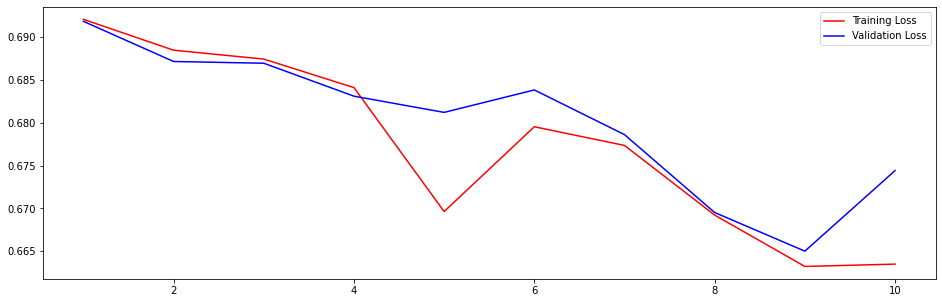

In [ ]:
plt.figure(figsize=(16,5))
epochs = range(1, len(history.history['accuracy'])+1)
plt.plot(epochs, history.history['loss'], 'b', label='Training Loss', color='red')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation Loss')
plt.legend()
plt.show()

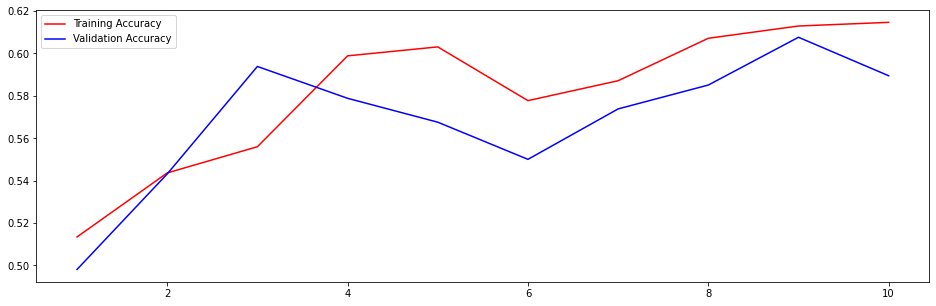

In [ ]:
plt.figure(figsize=(16,5))
epochs = range(1, len(history.history['accuracy'])+1)
plt.plot(epochs, history.history['accuracy'], 'b', label='Training Accuracy', color='red')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.legend()
plt.show()

**Findings:**
- We can see that the model has initial high validation loss and then it decreases.

- The training and test accuracy is nearly equal to 61%.

- We can further improve the model performance by creating more Deeper model.

### **Let's create more Deeper model using Bidirectional LSTM**

In [ ]:
model = Sequential()

embedding_size = 100

model.add(Embedding(input_dim=10000,output_dim=embedding_size,
                    input_length=max_tokens,name='embedding_layer', trainable=False))

model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_layer (Embedding)  (None, 280, 100)         1000000   
                                                                 
 bidirectional (Bidirectiona  (None, 280, 256)         234496    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dropout (Dropout)           (None, 64)               

In [ ]:
history = model.fit(x_train_pad, y_train, validation_split=0.2, epochs=10, batch_size=500, shuffle=True, verbose = 1)

Epoch 1/10
13/13 [==============================] - 130s 9s/step - loss: 0.6930 - accuracy: 0.5120 - val_loss: 0.6922 - val_accuracy: 0.5775
Epoch 2/10
13/13 [==============================] - 123s 10s/step - loss: 0.6852 - accuracy: 0.5564 - val_loss: 0.6718 - val_accuracy: 0.6050
Epoch 3/10
13/13 [==============================] - 121s 9s/step - loss: 0.6641 - accuracy: 0.6017 - val_loss: 0.6423 - val_accuracy: 0.6237
Epoch 4/10
13/13 [==============================] - 121s 9s/step - loss: 0.6408 - accuracy: 0.6366 - val_loss: 0.6337 - val_accuracy: 0.6350
Epoch 5/10
13/13 [==============================] - 120s 9s/step - loss: 0.6262 - accuracy: 0.6477 - val_loss: 0.6260 - val_accuracy: 0.6481
Epoch 6/10
13/13 [==============================] - 125s 10s/step - loss: 0.6150 - accuracy: 0.6623 - val_loss: 0.6422 - val_accuracy: 0.6119
Epoch 7/10
13/13 [==============================] - 125s 10s/step - loss: 0.6283 - accuracy: 0.6553 - val_loss: 0.6403 - val_accuracy: 0.6100
Epoch 8/10

In [ ]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train_pad,y_train)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(x_test_pad,y_test)[1]*100)

250/250 [==============================] - 61s 236ms/step - loss: 0.5929 - accuracy: 0.6830
Accuracy of the model on Training Data is -  68.30000281333923
63/63 [==============================] - 15s 235ms/step - loss: 0.6019 - accuracy: 0.6890
Accuracy of the model on Testing Data is -  68.90000104904175


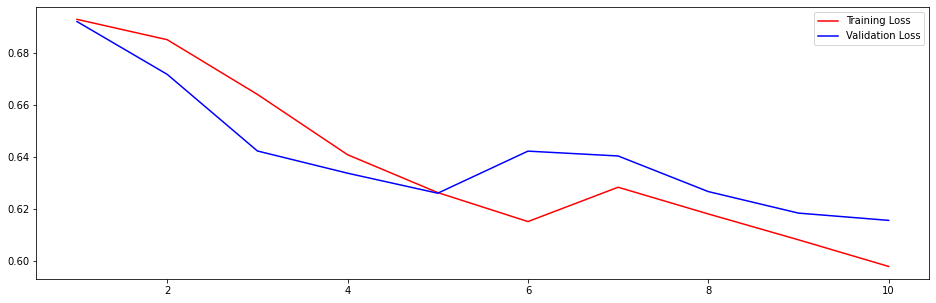

In [ ]:
plt.figure(figsize=(16,5))
epochs = range(1, len(history.history['accuracy'])+1)
plt.plot(epochs, history.history['loss'], 'b', label='Training Loss', color='red')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation Loss')
plt.legend()
plt.show()

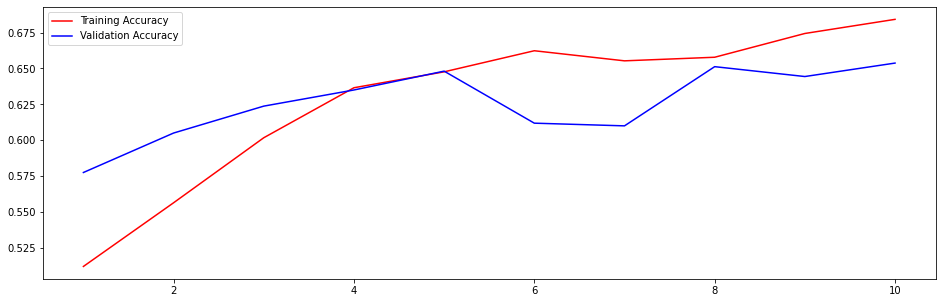

In [ ]:
plt.figure(figsize=(16,5))
epochs = range(1, len(history.history['accuracy'])+1)
plt.plot(epochs, history.history['accuracy'], 'b', label='Training Accuracy', color='red')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.legend()
plt.show()

**Findings:**
- We can see that the model training and validation loss  is decreased from 0.67 to 0.58  .

- The training and test accuracy is nearly improved from 61% to 68 %

- We can further improve the model performance by trying one more Deeper model.

**Let's try one more deeper model**

In [ ]:

model = Sequential()

embedding_size = 50

model.add(Embedding(input_dim=10000,output_dim=embedding_size,input_length=max_tokens,name='embedding_layer'))

model.add(LSTM(units=32, return_sequences=True))
model.add(Dropout(0.1))

model.add(LSTM(units=16, return_sequences=True))
model.add(Dropout(0.1))

model.add(LSTM(units=8, return_sequences=True))
model.add(Dropout(0.1))

model.add(LSTM(units=4))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=1e-3)

model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_layer (Embedding)  (None, 280, 50)          500000    
                                                                 
 lstm_3 (LSTM)               (None, 280, 32)           10624     
                                                                 
 dropout_1 (Dropout)         (None, 280, 32)           0         
                                                                 
 lstm_4 (LSTM)               (None, 280, 16)           3136      
                                                                 
 dropout_2 (Dropout)         (None, 280, 16)           0         
                                                                 
 lstm_5 (LSTM)               (None, 280, 8)            800       
                                                                 
 dropout_3 (Dropout)         (None, 280, 8)           

In [ ]:
history = model.fit(x_train_pad, y_train, validation_split=0.2, epochs=10, batch_size=500, shuffle=True, verbose = 1)

Epoch 1/10
13/13 [==============================] - 26s 1s/step - loss: 0.6922 - accuracy: 0.5125 - val_loss: 0.6913 - val_accuracy: 0.4900
Epoch 2/10
13/13 [==============================] - 17s 1s/step - loss: 0.6725 - accuracy: 0.6656 - val_loss: 0.6358 - val_accuracy: 0.7544
Epoch 3/10
13/13 [==============================] - 17s 1s/step - loss: 0.5764 - accuracy: 0.8195 - val_loss: 0.5483 - val_accuracy: 0.8106
Epoch 4/10
13/13 [==============================] - 17s 1s/step - loss: 0.4884 - accuracy: 0.8970 - val_loss: 0.5027 - val_accuracy: 0.8400
Epoch 5/10
13/13 [==============================] - 17s 1s/step - loss: 0.4170 - accuracy: 0.9389 - val_loss: 0.4616 - val_accuracy: 0.8494
Epoch 6/10
13/13 [==============================] - 16s 1s/step - loss: 0.3728 - accuracy: 0.9484 - val_loss: 0.4763 - val_accuracy: 0.8169
Epoch 7/10
13/13 [==============================] - 17s 1s/step - loss: 0.3361 - accuracy: 0.9570 - val_loss: 0.4273 - val_accuracy: 0.8512
Epoch 8/10
13/13 [==

In [ ]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train_pad,y_train)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(x_test_pad,y_test)[1]*100)

250/250 [==============================] - 20s 71ms/step - loss: 0.2594 - accuracy: 0.9531
Accuracy of the model on Training Data is -  95.3125
63/63 [==============================] - 4s 71ms/step - loss: 0.4412 - accuracy: 0.8275
Accuracy of the model on Testing Data is -  82.74999856948853


### **Visualization of Accuracy & Loss**

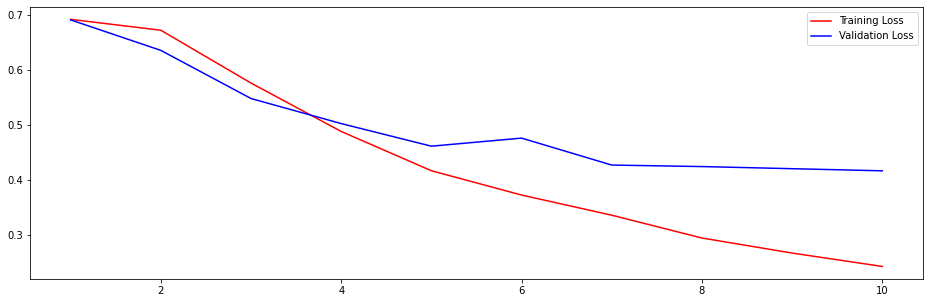

In [ ]:
plt.figure(figsize=(16,5))
epochs = range(1, len(history.history['accuracy'])+1)
plt.plot(epochs, history.history['loss'], 'b', label='Training Loss', color='red')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation Loss')
plt.legend()
plt.show()

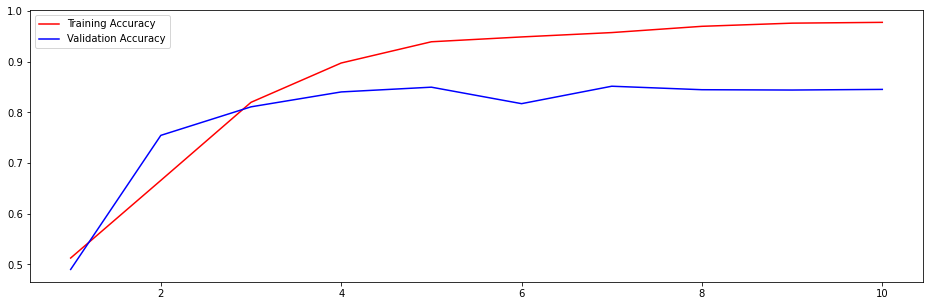

In [ ]:
plt.figure(figsize=(16,5))
epochs = range(1, len(history.history['accuracy'])+1)
plt.plot(epochs, history.history['accuracy'], 'b', label='Training Accuracy', color='red')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.legend()
plt.show()

**Findings:**
- The model performance is improved to agreater extent from basic model.
- We can see that the training loss is reduced to 0.21 and validation loss  is decreased to 0.42 from 0.58.  .

- The training accuracy is 95 % and test accuracy is greatly improved from 68% to 84 %
- We can use this model for final prediction from the test data



## **6. Use the designed model to print the prediction on any one sample.**

Let's use the model to predict the result for 3 random samples.

In [ ]:
import textwrap
from sklearn.metrics import accuracy_score

predicted_labels = model.predict(x_test_pad)
Y_sentiment = np.round(predicted_labels)

print("The predicted labels for any 3 entries from the dataset.\n")
for i in range(3):
    sample_rev = textwrap.fill(return_to_sentence(x_test_pad[i]),90)
    print("The sample review : \n ", sample_rev)

    if y_test.iloc[i] == 1:
      print("The original review label is : positive")
    else:
      print("The original review label is : negative")

    if Y_sentiment[i] == 1:
        print("The predicted_label is : positive")
    else:
        print("The predicted_label is : negative")
    print("\n")

The predicted labels for any 3 entries from the dataset.

The sample review : 
  one came directly jaws cookie cutter mold bizarre cliches thrown good measure interested
seeing finding still book italian horror films wow guess got deserved br br very slow
moving talky much killer shark movie takes place land really surprising seems like method
showing shark shots shark shark never frame actors bad characters annoying actually wish
would get eaten br br the plot concerns group four kids meet mysterious indian beach one
day indian reason gives ancient allow track ancient evil assumed form monster shark attack
tribe supposedly good fishing ocean ocean god worried would take fish something like that
br br it good thing ya know years later monster shark appears starts people sleepy
community one four guys eaten shark remaining three determined kill thing especially since
big shocker authorities killed shark think threat over yawn br br the obligatory death
scenes unbelievably tedious see co

In [ ]:
validation_sentence = ['It had some bad parts like the storyline although the actors performed really well and that is why overall I enjoyed it.']
validation_sentence_tokened = tokenizer.texts_to_sequences(validation_sentence)
validation_sentence_padded = pad_sequences(validation_sentence_tokened, maxlen=280,
                                    truncating='post', padding='post')
print(validation_sentence[0])
print("Probability of Positive: {}".format(model.predict(validation_sentence_padded)[0]))
prediction= ((model.predict(validation_sentence_padded)[0]) > 0.5).astype("int32")
if prediction == 1:
  print("The predicted label for validation sentence is : Positive")
else:
  print("The predicted label for validation sentence is : Negative")

It had some bad parts like the storyline although the actors performed really well and that is why overall I enjoyed it.
Probability of Positive: [0.6988825]
The predicted label for validation sentence is : Positive


* **The model performed well on test data by giving almost accurate prediction about sentiment as positive or negative.**

* **Thus our model is performing well by predicting unknown data correctly.**

* **The model accuracy is 84%**


• **DOMAIN:** Social media analytics

• **CONTEXT:**

Past studies in Sarcasm Detection mostly make use of Twitter datasets collected using hashtag based supervision but such datasets are noisy in terms of labels and language. Furthermore, many tweets are replies to other tweets and detecting sarcasm in
these requires the availability of contextual tweets.In this hands-on project, the goal is to build a model to detect whether a sentence is sarcastic or not, using Bidirectional LSTMs.

• **DATA DESCRIPTION:**

The dataset is collected from two news websites, theonion.com and huffingtonpost.com.

This new dataset has the following advantages over the existing Twitter datasets:
Since news headlines are written by professionals in a formal manner, there are no spelling mistakes and
informal usage. This reduces the sparsity and also increases the chance of finding pre-trained embeddings.
Furthermore, since the sole purpose of TheOnion is to publish sarcastic news, we get high-quality labels with
much less noise as compared to Twitter datasets.
Unlike tweets that reply to other tweets, the news headlines obtained are self-contained. This would help us in teasing apart the real sarcastic elements
**Content:**

Each record consists of three attributes:

is_sarcastic: 1 if the record is sarcastic otherwise 0

headline: the headline of the news article

article_link: link to the original news article. Useful in collecting supplementary data

Reference: https://github.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection

• **PROJECT OBJECTIVE:**

Build a sequential NLP classifier which can use input text parameters
to determine the customer sentiments.
Steps and tasks: [ Total Score: 30 points]
1. Read and explore the data
2. Retain relevant columns
3. Get length of each sentence
4. Define parameters
5. Get indices for words
6. Create features and labels
7. Get vocabulary size
8. Create a weight matrix using GloVe embeddings
9. Define and compile a Bidirectional LSTM model.
Hint: Be analytical and experimental here in trying new approaches to design the best model.
10. Fit the model and check the validation accuracy



**LOADING THE NECESSARY LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize

from bs4 import BeautifulSoup
import re,string,unicodedata

from keras.preprocessing import text, sequence

import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout,Bidirectional,GRU
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split

from string import punctuation

## **1. Read and explore the data**

**LOADING THE DATASET**

In [ ]:
df =  pd.read_json("/content/drive/MyDrive/AIML-GL/Natural Language Processing/PROJECT 2 NLP/Sarcasm_Headlines_Dataset_v2.json",lines=True)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


**Check for null values in the dataset**

In [ ]:
df.isna().sum() # Checking for NaN values

is_sarcastic    0
headline        0
article_link    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


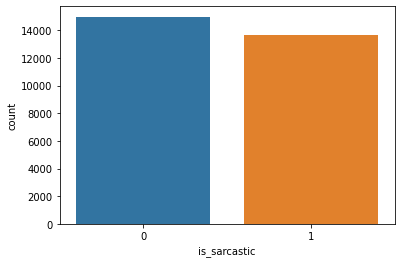

In [ ]:
sns.countplot(df['is_sarcastic'])

We can observe that there are **NO NULL values** as well as the **dataset is balanced**.

## **2. Retain relevant columns**

**Drop** the **article link** column as it do not carry any information.

In [ ]:
del df['article_link']

## **3. Get length of each sentence**

**Let's preprocess the data to obtain average length of sentences.**

* Remove the square brackets from the text under headlines column
* Remove URL
* Remove stopwords

Stopwords are commonly occuring words in a language like 'the', 'a' and so on. They can be removed from the text most of the times, as they don't provide valuable information for downstream analysis. In cases like Part of Speech tagging, we should not remove them as provide very valuable information about the POS.

These stopword lists are already compiled for different languages and we can safely use them. For example, the stopword list for english language from the nltk package can be seen below.

In [ ]:
import nltk
nltk.download('stopwords')
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

**DATA CLEANING**

In [ ]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)

#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)


In [ ]:
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

#Apply function on review column
df['headline']=df['headline'].apply(denoise_text)

In [ ]:
df['headline'].head()

0    thirtysomething scientists unveil doomsday clo...
1    dem rep. totally nails congress falling short ...
2         eat veggies: 9 deliciously different recipes
3         inclement weather prevents liar getting work
4    mother comes pretty close using word 'streamin...
Name: headline, dtype: object

**WORDCLOUD FOR NOT SARCASTIC TEXT (LABEL - 0)**

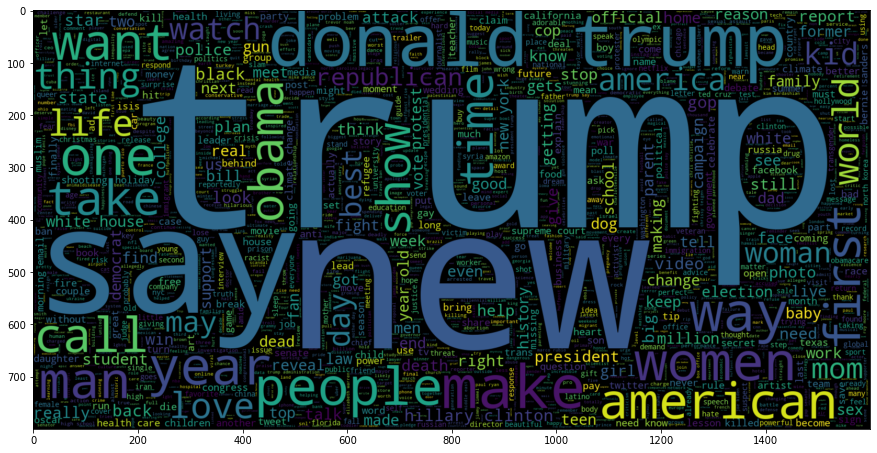

In [ ]:
plt.figure(figsize= (15,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.is_sarcastic == 0].headline))
plt.imshow(wc , interpolation = 'bilinear')

**WORDCLOUD FOR SARCASTIC TEXT (LABEL - 1)**

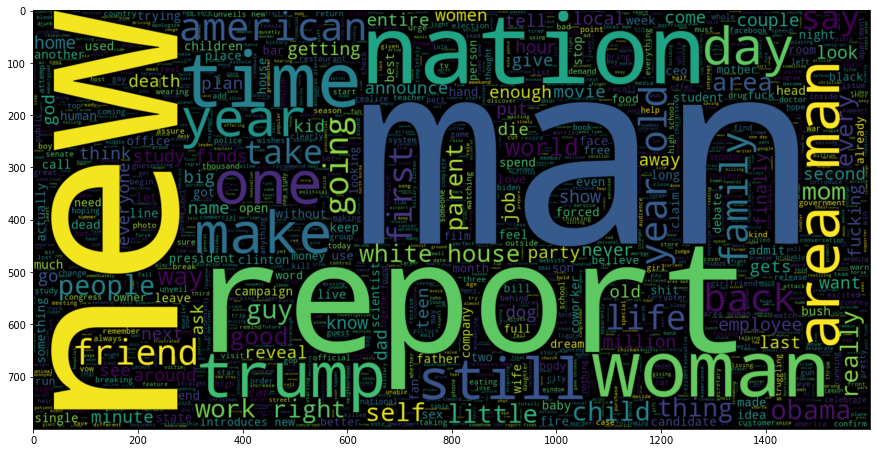

In [ ]:
plt.figure(figsize= (15,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.is_sarcastic == 1].headline))
plt.imshow(wc , interpolation = 'bilinear')

## **4. Define parameters**

**Let's find number of characters in the text**

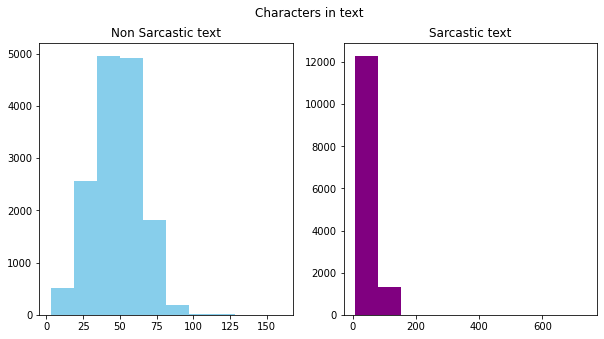

In [ ]:
len_text_n = df[df["is_sarcastic"] == 0]['headline'].str.len()
len_text_y = df[df["is_sarcastic"] == 1]['headline'].str.len()

fig,(ax1,ax2) = plt.subplots(1,2,figsize = (10,5))

ax1.hist(len_text_n,color='SKYBLUE')
ax1.set_title("Non Sarcastic text")

ax2.hist(len_text_y,color='PURPLE')
ax2.set_title("Sarcastic text")

fig.suptitle('Characters in text')
plt.show()


**Number of words in each text**

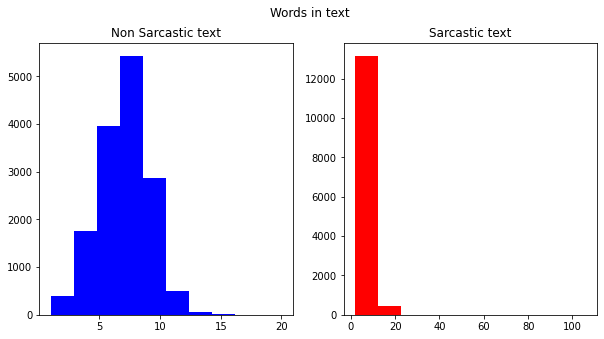

In [ ]:
len_text_n = df[df["is_sarcastic"] == 0]['headline'].str.split().map(lambda x: len(x))
len_text_y = df[df["is_sarcastic"] == 1]['headline'].str.split().map(lambda x: len(x))

fig,(ax1,ax2) = plt.subplots(1,2,figsize = (10,5))

ax1.hist(len_text_n,color='BLUE')
ax1.set_title("Non Sarcastic text")

ax2.hist(len_text_y,color='RED')
ax2.set_title("Sarcastic text")

fig.suptitle('Words in text')
plt.show()

**Average word length in a text**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


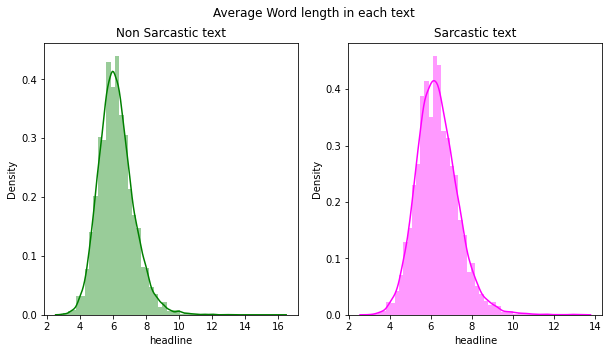

In [ ]:
word_n = df[df["is_sarcastic"] == 0]['headline'].str.split().apply(lambda x: [len(i) for i in x])
word_y = df[df["is_sarcastic"] == 1]['headline'].str.split().apply(lambda x: [len(i) for i in x])

fig,(ax1,ax2) = plt.subplots(1,2,figsize = (10,5))

sns.distplot(word_n.map(lambda x: np.mean(x)),ax=ax1,color='Green')
ax1.set_title("Non Sarcastic text")

sns.distplot(word_y.map(lambda x: np.mean(x)),ax=ax2,color='Magenta')
ax2.set_title("Sarcastic text")

fig.suptitle('Average Word length in each text')
plt.show()

## **5. Get indices for words**

**Gensim :** It is an open source library in python written by Radim Rehurek which is used in unsupervised topic modelling and natural language processing. It is designed to extract semantic topics from documents. It can handle large text collections. Hence it makes it different from other machine learning software packages which target memory processing. Gensim also provides efficient multicore implementations for various algorithms to increase processing speed. It provides more convenient  facilities for text processing

In [ ]:
# Converting text to format acceptable by gensim
words = []
for i in df.headline.values:
    words.append(i.split())
words[:5]

[['thirtysomething',
  'scientists',
  'unveil',
  'doomsday',
  'clock',
  'hair',
  'loss'],
 ['dem',
  'rep.',
  'totally',
  'nails',
  'congress',
  'falling',
  'short',
  'gender,',
  'racial',
  'equality'],
 ['eat', 'veggies:', '9', 'deliciously', 'different', 'recipes'],
 ['inclement', 'weather', 'prevents', 'liar', 'getting', 'work'],
 ['mother',
  'comes',
  'pretty',
  'close',
  'using',
  'word',
  "'streaming'",
  'correctly']]

In [ ]:
import gensim
#Dimension of vectors we are generating
EMBEDDING_DIM = 200

#Creating Word Vectors by Word2Vec Method
w2v_model = gensim.models.Word2Vec(sentences = words , size=EMBEDDING_DIM , window = 5 , min_count = 1)

In [ ]:
vocab_len=len(w2v_model.wv.vocab)
print("The length of vocab is :",vocab_len)

The length of vocab is : 38071


**Tokenize the words**

In [ ]:
tokenizer = Tokenizer(num_words=vocab_len, split=' ')
tokenizer.fit_on_texts(words)
X = tokenizer.texts_to_sequences(words)
X = pad_sequences(X, maxlen = 20)

In [ ]:
X.shape

(28619, 20)

In [ ]:
X[1]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,  7174,  2484,   588,  2833,   134,  1725,  1136, 11455,
        1990,  1810], dtype=int32)

# **Indices for words**

In [ ]:
tokenizer.word_index

{'new': 1,
 'man': 2,
 'trump': 3,
 'one': 4,
 'area': 5,
 'woman': 6,
 'says': 7,
 'donald': 8,
 'report:': 9,
 'u.s.': 10,
 'day': 11,
 'like': 12,
 'get': 13,
 'first': 14,
 'time': 15,
 "trump's": 16,
 'people': 17,
 'still': 18,
 'house': 19,
 'white': 20,
 'make': 21,
 'life': 22,
 'obama': 23,
 'back': 24,
 'women': 25,
 'could': 26,
 'clinton': 27,
 'americans': 28,
 'way': 29,
 'world': 30,
 'family': 31,
 'would': 32,
 'gop': 33,
 'finds': 34,
 'bill': 35,
 'really': 36,
 'black': 37,
 'years': 38,
 '5': 39,
 "can't": 40,
 'school': 41,
 'police': 42,
 'best': 43,
 'nation': 44,
 'know': 45,
 'going': 46,
 'every': 47,
 'american': 48,
 'last': 49,
 'death': 50,
 "'the": 51,
 'say': 52,
 'state': 53,
 'campaign': 54,
 'home': 55,
 'getting': 56,
 'health': 57,
 'things': 58,
 'president': 59,
 'mom': 60,
 'good': 61,
 'may': 62,
 'show': 63,
 'big': 64,
 'gets': 65,
 'hillary': 66,
 'year': 67,
 'need': 68,
 'little': 69,
 'take': 70,
 'video': 71,
 'work': 72,
 'parents': 73

## **6. Create features and labels**

In [ ]:
# perform train test split

x_train, x_test, y_train, y_test = train_test_split(X, df.is_sarcastic , test_size = 0.2 , random_state = 0)

In [ ]:
print("Number of Samples in X_train: ", len(x_train))
print("\n")
print(x_train[0])

Number of Samples in X_train:  22895


[    0     0     0     0     0     0     0     0     0  3331   309 25659
 25660  6779   602   293  1431   677   447 25661]


In [ ]:
print("Number of Samples in y_train:", len(y_train))
print("\n")
print(y_train[0])

Number of Samples in y_train: 22895


1


## **7. Get vocabulary size**

**Set number of words**

It can be seen that 0th index doesn't have a word, add 1 to the length of the vocabulary

In [ ]:
# Adding 1 because of reserved 0 index
# Embedding Layer creates one more vector for "UNKNOWN" words, or padded words (0s). This Vector is filled with zeros.
# Thus our vocab size increases by 1
vocab_size = len(tokenizer.word_index) + 1
print("The size of vocabulary for the dataset is: ",vocab_size)

The size of vocabulary for the dataset is:  38072


## **8. Create a weight matrix using GloVe embeddings**

## **Word Embedding and Word2Vec**
Word embedding is one of the most popular representation of document It is capable of capturing context of a word in a document, semantic and syntactic similarity, relation with other words, etc.

Word2Vec is one of the most popular technique to learn word embeddings using shallow neural network. It was developed by Tomas Mikolov in 2013 at Google.

Word2Vec is a method to construct such an embedding. It can be obtained using two methods (both involving Neural Networks): Skip Gram and Common Bag Of Words (CBOW)

In [ ]:
# Function to create weight matrix from word2vec gensim model

def get_weight_matrix(model, vocab):
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    # store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = model[word]
    return weight_matrix

In [ ]:
#Getting embedding vectors from word2vec and usings it as weights of non-trainable keras embedding layer
embedding_vectors = get_weight_matrix(w2v_model, tokenizer.word_index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


## **9. Define and compile a Bidirectional LSTM model.**

### **BERT**

BERT (Bidirectional Encoder Representations from Transformers) is a recent paper published by researchers at Google AI Language. It has caused a stir in the Machine Learning community by presenting state-of-the-art results in a wide variety of NLP tasks, including Question Answering (SQuAD v1.1), Natural Language Inference (MNLI), and others.

BERT’s key technical innovation is applying the bidirectional training of Transformer, a popular attention model, to language modelling. This is in contrast to previous efforts which looked at a text sequence either from left to right or combined left-to-right and right-to-left training. The paper’s results show that a language model which is bidirectionally trained can have a deeper sense of language context and flow than single-direction language models. In the paper, the researchers detail a novel technique named Masked LM (MLM) which allows bidirectional training in models in which it was previously impossible.

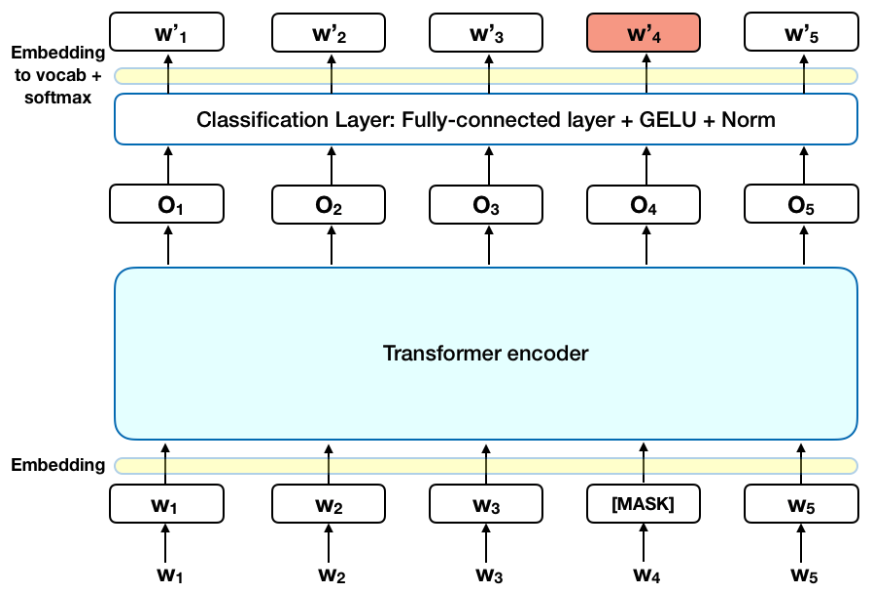

### **creating a basic model**

In [ ]:
from tensorflow.keras.optimizers import Adam

model = Sequential()

#Non-trainable embeddidng layer
model.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=20, trainable=True))

#LSTM
model.add(Bidirectional(LSTM(units=128 , recurrent_dropout = 0.3 , dropout = 0.3,return_sequences = True)))
model.add(Bidirectional(GRU(units=32 , recurrent_dropout = 0.1 , dropout = 0.1)))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.01)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 200)           7614400   
                                                                 
 bidirectional_2 (Bidirectio  (None, 20, 256)          336896    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               55680     
 nal)                                                            
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,007,041
Trainable params: 8,007,041
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, batch_size = 128 , validation_data = (x_test,y_test) , epochs = 3)

Epoch 1/3
179/179 [==============================] - 110s 560ms/step - loss: 0.4988 - acc: 0.7465 - val_loss: 0.3954 - val_acc: 0.8195
Epoch 2/3
179/179 [==============================] - 100s 559ms/step - loss: 0.1493 - acc: 0.9453 - val_loss: 0.4768 - val_acc: 0.8052
Epoch 3/3
179/179 [==============================] - 100s 557ms/step - loss: 0.0385 - acc: 0.9868 - val_loss: 0.7283 - val_acc: 0.8031


In [ ]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(x_test,y_test)[1]*100)

716/716 [==============================] - 19s 27ms/step - loss: 0.0096 - acc: 0.9979
Accuracy of the model on Training Data is -  99.79034662246704
179/179 [==============================] - 5s 26ms/step - loss: 0.7283 - acc: 0.8031
Accuracy of the model on Testing Data is -  80.31097054481506


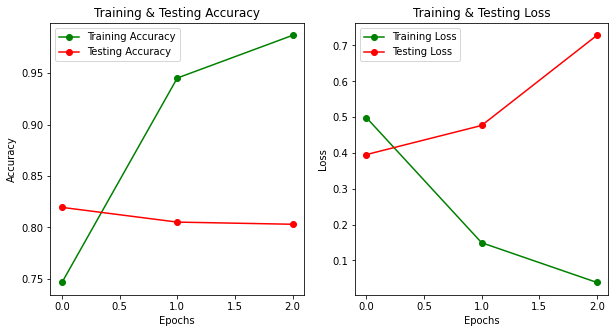

In [ ]:
epochs = [i for i in range(3)]
fig , ax = plt.subplots(1,2,figsize=(10,5))

train_acc = history.history['acc']
train_loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
fig.set_size_inches(10,5)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
pred =(model.predict(x_test) > 0.5).astype("int32")
pred[:5]

array([[1],
       [0],
       [1],
       [0],
       [1]], dtype=int32)

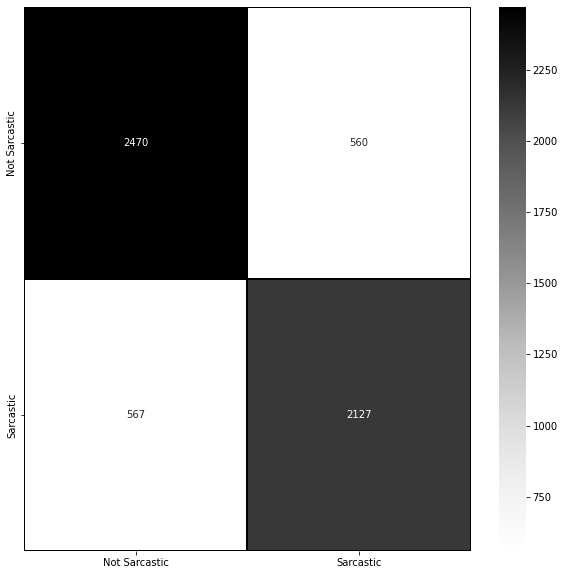

In [ ]:
cm = confusion_matrix(y_test,pred)
cm = pd.DataFrame(cm , index = ['Not Sarcastic','Sarcastic'] , columns = ['Not Sarcastic','Sarcastic'])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Greys", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Not Sarcastic','Sarcastic'] , yticklabels = ['Not Sarcastic','Sarcastic'])

### **The model is overfitting and not performing well on test data**

## **Let's create another dense model using Glove Embeddings**

**Get length of each headline and text and add a column for that**

In [ ]:
df['len_headline'] = df['headline'].apply(lambda x: len(x.split(" ")))

In [ ]:
df.head()

,is_sarcastic,headline,len_headline
0,1,thirtysomething scientists unveil doomsday clo...,7
1,0,dem rep. totally nails congress falling short ...,10
2,0,eat veggies: 9 deliciously different recipes,6
3,1,inclement weather prevents liar getting work,6
4,1,mother comes pretty close using word 'streamin...,8


**Check the distribution of data**

        This will help us in deciding maxlen

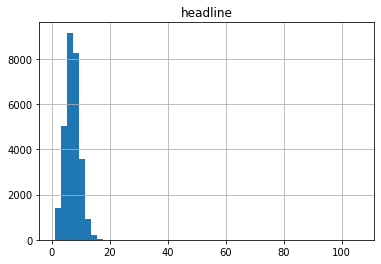

In [ ]:
import matplotlib.pyplot as plt

headline_word_count = []

# populate the lists with sentence lengths

for i in df['headline']:
  headline_word_count.append(len(i.split()))

length_df = pd.DataFrame({'headline':headline_word_count})
length_df.hist(bins = 50)
plt.show()

**Let's check the percentage of heading below 18 words**

In [ ]:
cnt=0
for i in df['headline']:
    if(len(i.split())<=18):
        cnt=cnt+1
print(cnt/len(df['headline']))

0.9996855236032006


## **Train test split**


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df.headline,df.is_sarcastic, test_size = 0.3 , random_state = 10)

In [ ]:
max_features = 35000
maxlen = 200

Tokenizing Text -> Repsesenting each word by a number

Mapping of orginal word to number is preserved in word_index property of tokenizer

Tokenized applies basic processing like changing it to lower case, explicitely setting that as False

Lets keep all news to 200, add padding to news with less than 200 words and truncating long ones

In [ ]:
feature_tokenizer = Tokenizer(num_words=max_features)
feature_tokenizer.fit_on_texts(x_train)
x_train= feature_tokenizer.texts_to_sequences(x_train)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)

x_test = feature_tokenizer.texts_to_sequences(x_test)
X_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [ ]:
print("Number of Samples in X_train:", len(x_train))
print(x_train[0])

Number of Samples in X_train: 20033
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0 

GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.

In [ ]:
EMBEDDING_FILE = "/content/drive/MyDrive/AIML-GL/Natural Language Processing/PROJECT 2 NLP/glove.twitter.27B.200d.txt"

In [ ]:
def get_coefs(word, *arr):
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))

In [ ]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))

#change below line if computing normal stats is too slow
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


**TRAINING GLOVE EMBEDDINGS MODEL**

In [ ]:
batch_size = 128
epochs = 2
embed_size = 200

In [ ]:
#Defining Neural Network
model = Sequential()

#Non-trainable embeddidng layer
model.add(Embedding(nb_words, output_dim=embed_size, weights=[embedding_matrix], input_length=200, trainable=True))

#LSTM
model.add(Bidirectional(LSTM(units=128 , recurrent_dropout = 0.5 , dropout = 0.5)))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.01)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 200)          7000000   
                                                                 
 bidirectional_4 (Bidirectio  (None, 256)              336896    
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 1)                 257       
                                                                 
Total params: 7,337,153
Trainable params: 7,337,153
Non-trainable params: 0
_________________________________________________________________


## **10. Fit the model and check the validation accuracy**

In [ ]:
history = model.fit(x_train, y_train, batch_size = batch_size , validation_data = (X_test,y_test) , epochs = 2)

Epoch 1/2
157/157 [==============================] - 571s 4s/step - loss: 0.6061 - acc: 0.6585 - val_loss: 0.4554 - val_acc: 0.7919
Epoch 2/2
157/157 [==============================] - 591s 4s/step - loss: 0.2909 - acc: 0.8783 - val_loss: 0.4532 - val_acc: 0.8128


In [ ]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100)

627/627 [==============================] - 133s 213ms/step - loss: 0.1074 - acc: 0.9675
Accuracy of the model on Training Data is -  96.74537181854248
269/269 [==============================] - 43s 159ms/step - loss: 0.4532 - acc: 0.8128
Accuracy of the model on Testing Data is -  81.28348588943481


In [ ]:
# Let's use the model for prediction and print first 5 prediction values
pred =(model.predict(X_test) > 0.5).astype("int32")
for i in range(5):
  print("The review is: ",return_to_sentence(X_test[i]))
  print("The predicted label is: ", pred[i])
  print("\n")

The review is:  formula spleen right fu
The predicted label is:  [0]


The review is:  pick us stephane process bailed
The predicted label is:  [1]


The review is:  yourself kill good great damn couple home metal world audience killed hospital
The predicted label is:  [1]


The review is:  it musician adapted dvd
The predicted label is:  [0]


The review is:  satan hence horror big equally
The predicted label is:  [0]




In [ ]:
print(classification_report(y_test, pred, target_names = ['Not Sarcastic','Sarcastic']))

               precision    recall  f1-score   support

Not Sarcastic       0.79      0.88      0.83      4507
    Sarcastic       0.85      0.74      0.79      4079

     accuracy                           0.81      8586
    macro avg       0.82      0.81      0.81      8586
 weighted avg       0.82      0.81      0.81      8586



In [ ]:
cm = confusion_matrix(y_test,pred)
cm

array([[3965,  542],
       [1065, 3014]])

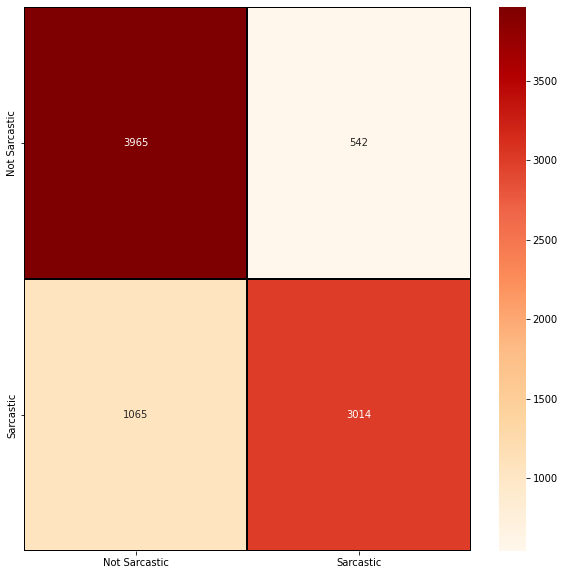

In [ ]:
cm = pd.DataFrame(cm , index = ['Not Sarcastic','Sarcastic'] , columns = ['Not Sarcastic','Sarcastic'])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "OrRd", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Not Sarcastic','Sarcastic'] , yticklabels = ['Not Sarcastic','Sarcastic'])

- **Thus the model using Glove Embeddings is performing better with 84 % accuracy.**

- **From confusion matrix we can observe that 3965 reviews are correctly classified as Non Sarcastic (True Negative) and 3014 reviews are correctly classified as Sarcastic (True Positive).**

- **The model also has better Recall  (86 %) and F1 Score (83 %).**


# **PART 2**

**• DOMAIN:** Digital content management

**• CONTEXT:**

Classification is probably the most popular task that you would deal with in real life. Text in the form of blogs, posts, articles, etc. is written every second. It is a challenge to predict the information about the writer without knowing about him/her. We are going to create a classifier that predicts multiple features of the author of a given text. We have designed it as a Multi label classification problem.

**• DATA DESCRIPTION:**

Over 600,000 posts from more than 19 thousand bloggers The Blog Authorship Corpus consists of the collected
posts of 19,320 bloggers gathered from blogger.com in August 2004. The corpus incorporates a total of 681,288 posts and over 140 million words - or approximately 35 posts and 7250 words per person. Each blog is presented as a separate file, the name of which indicates a blogger id# and the blogger’s self-provided gender, age, industry, and astrological sign. (All are labelled for gender and age but for many,industry and/or sign is marked as unknown.) All bloggers included in the corpus fall into one of three age groups:

• 8240 "10s" blogs (ages 13-17),

• 8086 "20s" blogs(ages 23-27) and

• 2994 "30s" blogs (ages 33-47)

For each age group, there is an equal number of male and female bloggers.

Each blog in the corpus includes at least 200 occurrences of common English words. All formatting has been stripped with two exceptions.
Individual posts within a single blogger are separated by the date of the following post and links within a post are denoted by the label url link.

Link to dataset: https://www.kaggle.com/rtatman/blog-authorship-corpus


**• PROJECT OBJECTIVE**:

The need is to build a NLP classifier which can use input text parameters to determine the label/s of the blog.

**• Steps and tasks:**
1. Import and analyse the data set.
2. Perform data pre-processing on the data:

• Data cleansing by removing unwanted characters, spaces, stop words etc. Convert text to lowercase.

• Target/label merger and transformation

• Train and test split

• Vectorisation, etc.

3. Design, train, tune and test the best text classifier.
4. Display and explain detail the classification report
5. Print the true vs predicted labels for any 5 entries from the dataset.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from nltk.tokenize import RegexpTokenizer
from sklearn.decomposition import PCA
from matplotlib import pyplot
%matplotlib inline

import numpy as np
import pandas as pd
import re

## **1. Import and analyse the data set.**

In [ ]:
Project_path = "/content/drive/MyDrive/AIML/Natural Language Processing/PROJECT 1 NLP/blogtext.csv.zip"

In [ ]:
from zipfile import ZipFile
with ZipFile(Project_path, 'r') as z:
  z.extractall()

In [ ]:
data = pd.read_csv('./blogtext.csv')
data.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [ ]:
data.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

There are no null values in the dataset

In [ ]:
data.shape

(681284, 7)

The dataset has 681284 rows and 7 columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


## **Cut the data (skip this step in final run)**

Make the data short during development. So that overall process takes less time to execute and we will be able to rectify all the errors fast, and check if the code is running smooth.

  When evrything is sorted at last, load the entire data and run your code on that and skip this step.

In [ ]:
data=data.head(10000)

## **2. Perform data pre-processing on the data:**
* Data cleansing by removing unwanted characters, spaces, stop words etc.

* Convert text to lowercase.
* Target/label merger and transformation

### **Data cleansing by removing unwanted characters, spaces, stop words.**

**Preprocess values of text column**

* Remove unwanted characters/ remove Punctuation

* remove unwanted space

* Convert text to lowercase

* Remove unwanted spaces

* Remove stopwords



1.   We can remove "id" and "date" as it do not carry any information
2.   convert all the columns as "object" data type --> covert data type of age into "object"



In [ ]:
data.drop(['id','date'], axis=1, inplace=True)

In [ ]:
data['age']=data['age'].astype('object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  10000 non-null  object
 1   age     10000 non-null  object
 2   topic   10000 non-null  object
 3   sign    10000 non-null  object
 4   text    10000 non-null  object
dtypes: object(5)
memory usage: 390.8+ KB


**Removal of stopwords**

Stopwords are commonly occuring words in a language like 'the', 'a' and so on. They can be removed from the text most of the times, as they don't provide valuable information for downstream analysis. In cases like Part of Speech tagging, we should not remove them as provide very valuable information about the POS.


These stopword lists are already compiled for different languages and we can safely use them. For example, the stopword list for english language from the nltk package can be seen below.

In [ ]:
# Select only alphabets
import nltk
nltk.download('stopwords')
import re

#remove punctuations
data["clean"] = data.text.apply(lambda x: re.sub('[^A-Za-z]+', ' ', x))

# Convert text to lowercase
data["clean"] = data["clean"].apply(lambda x: x.lower())

# Strip unwanted spaces
data["clean"] = data["clean"].apply(lambda x: x.strip())

# Remove stopwords
from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))
data["clean"] = data["clean"].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


This step is ommited as it was giving wierd results

In [ ]:
# stemmer = SnowballStemmer("english", ignore_stopwords=True)
# data["stemmed"] = data["text"].apply(lambda texts : [stemmer.stem(text) for text in texts])
# data["stemmed"]

### **Verify the preprocessing steps by looking over some values**

In [ ]:
data.clean[12]

'last night pretty fun mostly company kept recently met couple finance types yeouido hard referred korea wall street spoke pretty good english rarity yeouido everywhere korea studied outside korea deal international business still brutal canadian accent made pretty tough figure saying sometimes one time accent got way though went restaurant guy junseok gal named hye kyung asked like deok wrote heard thought meant dog eat called bluff said sure let go kind dog oh deok deok ya dog deok said figured meant duck said oh oh ri duck gay dog speak korean know food great went obligatory ee cha thanks hye kyung correction second round koreans never go one place eat drink usually wander streets go three four five places couple weeks ago hongdae university bar district went places san nak ji living octopus restaurant old rock cool bar noraebang korean word karaoke finally clubnb noise basement wee hours morning personally prefer kangnam version clubnb since hongdae went one coolest thing bar hoppi

**EDA**

After cleaning the text , let's have some idea about the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  10000 non-null  object
 1   age     10000 non-null  object
 2   topic   10000 non-null  object
 3   sign    10000 non-null  object
 4   text    10000 non-null  object
 5   clean   10000 non-null  object
dtypes: object(6)
memory usage: 468.9+ KB


In [ ]:
pd.set_option('display.max_colwidth', 50)
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
gender,male,male,male,male,male,male,male,male,male,male
age,15,15,15,15,33,33,33,33,33,33
topic,Student,Student,Student,Student,InvestmentBanking,InvestmentBanking,InvestmentBanking,InvestmentBanking,InvestmentBanking,InvestmentBanking
sign,Leo,Leo,Leo,Leo,Aquarius,Aquarius,Aquarius,Aquarius,Aquarius,Aquarius
text,"Info has been found (+/- 100 pages,...",These are the team members: Drewe...,In het kader van kernfusie op aarde...,testing!!! testing!!!,Thanks to Yahoo!'s Toolbar I can ...,I had an interesting conversation...,Somehow Coca-Cola has a way of su...,"If anything, Korea is a country o...",Take a read of this news article ...,I surf the English news sites a l...
clean,info found pages mb pdf files wait untill team...,team members drewes van der laag urllink mail ...,het kader van kernfusie op aarde maak je eigen...,testing testing,thanks yahoo toolbar capture urls popups means...,interesting conversation dad morning talking k...,somehow coca cola way summing things well earl...,anything korea country extremes everything see...,take read news article urllink joongang ilbo n...,surf english news sites lot looking tidbits ko...


In [ ]:
data.isnull().any().any()


False

In [ ]:
print(data.age.value_counts())

35    2315
36    1708
17    1185
27    1054
24     655
15     602
34     553
16     440
25     386
23     253
26     234
14     212
33     136
39      79
38      46
13      42
37      33
41      20
45      16
42      14
46       7
43       6
44       3
40       1
Name: age, dtype: int64


### **let's do some memory analysis for dataframe and try reducing whenever possible**

In [ ]:
orignal_mem = data.memory_usage(deep=True)

In [ ]:
orignal_mem

Index          128
gender      618168
age         360000
topic       650297
sign        632415
text      10799209
clean      5988870
dtype: int64

In [ ]:
data.gender.value_counts()

male      5916
female    4084
Name: gender, dtype: int64

There are almost equal number of male and female in the dataset

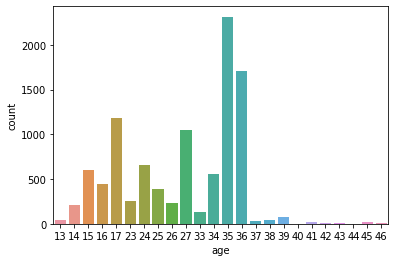

In [ ]:
import seaborn as sns

sns.countplot(x="age", data=data)

The range of age is between 13 to 46. very less number of bloggers are aged more than 36.

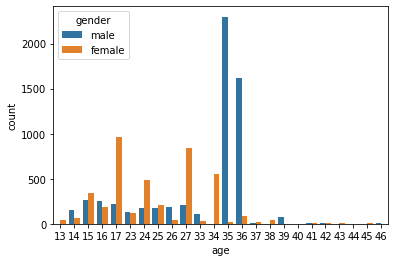

In [ ]:
sns.countplot(x="age", hue="gender", data=data)

There are more female bloggers between age 13 to 34 and more male bloggers of age more than 34.

### **Target/label merger and transformation**

**Merging all the other columns into labels columns**

In [ ]:
data['labels']=data.apply(lambda col: [col['gender'],str(col['age']),col['topic'],col['sign']], axis=1)

In [ ]:
data.head()

,gender,age,topic,sign,text,clean,labels
0,male,15,Student,Leo,"Info has been found (+/- 100 pages,...",info found pages mb pdf files wait untill team...,"[male, 15, Student, Leo]"
1,male,15,Student,Leo,These are the team members: Drewe...,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,male,15,Student,Leo,In het kader van kernfusie op aarde...,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,male,15,Student,Leo,testing!!! testing!!!,testing testing,"[male, 15, Student, Leo]"
4,male,33,InvestmentBanking,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,thanks yahoo toolbar capture urls popups means...,"[male, 33, InvestmentBanking, Aquarius]"


### **Select only required columns from your dataframe**

In [ ]:
data=data[['clean','labels']]

In [ ]:
data.head(5)

,clean,labels
0,info found pages mb pdf files wait untill team...,"[male, 15, Student, Leo]"
1,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,testing testing,"[male, 15, Student, Leo]"
4,thanks yahoo toolbar capture urls popups means...,"[male, 33, InvestmentBanking, Aquarius]"


### **Train and test split**

**Create training and testing data**

**1.   Splitting the data into X a**nd Y

In [ ]:
X=data['clean']
Y= data['labels']

**2. Lets perform count vectorizer with bi-grams and tri-grams to get the count vectors of the X data**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer(binary=True, ngram_range=(1,2))
X=vectorizer.fit_transform(X)


In [ ]:
X[1]

<1x643302 sparse matrix of type '<class 'numpy.int64'>'
	with 25 stored elements in Compressed Sparse Row format>

**3. Let us see some feature names**

In [ ]:
vectorizer.get_feature_names_out()[:5]

array(['aa', 'aa amazing', 'aa anger', 'aa compared', 'aa keeps'],
      dtype=object)

**Create a dictionary to get the count of every label**

The key will be label name and value will be the total count of the label.


In [ ]:
label_counts=dict()

for labels in data.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[label]+=1
        else:
            label_counts[label]=1

In [ ]:
print(label_counts)
print("Total Number of labels : ",len(label_counts))

{'male': 5916, '15': 602, 'Student': 1137, 'Leo': 301, '33': 136, 'InvestmentBanking': 70, 'Aquarius': 571, 'female': 4084, '14': 212, 'indUnk': 3287, 'Aries': 4198, '25': 386, 'Capricorn': 215, '17': 1185, 'Gemini': 150, '23': 253, 'Non-Profit': 71, 'Cancer': 504, 'Banking': 16, '37': 33, 'Sagittarius': 1097, '26': 234, '24': 655, 'Scorpio': 971, '27': 1054, 'Education': 270, '45': 16, 'Engineering': 127, 'Libra': 491, 'Science': 63, '34': 553, '41': 20, 'Communications-Media': 99, 'BusinessServices': 91, 'Sports-Recreation': 80, 'Virgo': 236, 'Taurus': 812, 'Arts': 45, 'Pisces': 454, '44': 3, '16': 440, 'Internet': 118, 'Museums-Libraries': 17, 'Accounting': 4, '39': 79, '35': 2315, 'Technology': 2654, '36': 1708, 'Law': 11, '46': 7, 'Consulting': 21, 'Automotive': 14, '42': 14, 'Religion': 9, '13': 42, 'Fashion': 1622, '38': 46, '43': 6, 'Publishing': 4, '40': 1, 'Marketing': 156, 'LawEnforcement-Security': 10, 'HumanResources': 2, 'Telecommunications': 2}
Total Number of labels :  

### **Pre-processing the labels**
**Binarize the labels.**

* Multi label binarizer

* Load a multilabel binarizer and fit it on the labels.

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))

In [ ]:
Y=binarizer.fit_transform(data.labels)

**Splitting the data into 80% Train set :20% Test set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

## **3. Design, train, tune and test the best text classifier.**

Use a linear LogisticRegression classifier and, wrap it up in OneVsRestClassifier to train it on every label.

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs')
clf = OneVsRestClassifier(clf)

In [ ]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 17 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])


OneVsRestClassifier(estimator=LogisticRegression())

## **Make predictions**

**Get predicted labels and scores**

In [ ]:
predicted_labels = clf.predict(X_test)
predicted_scores = clf.decision_function(X_test)

### **Get inverse transform for predicted labels and test labels**

Transform between iterable of iterables and a multilabel format

As we have noticed before, in this task each example can have multiple tags. To deal with such kind of prediction, we need to transform labels in a binary form and the prediction will be a mask of 0s and 1s. For this purpose, it is convenient to use MultiLabelBinarizer from sklearn a. Convert your train and test labels using MultiLabelBinarizer

In [ ]:
pred_inversed = binarizer.inverse_transform(predicted_labels)
y_test_inversed = binarizer.inverse_transform(y_test)

## **4. Display and explain in detail the classification report**
We will predict the system performance based on following metrics

1. Accuracy score
2. F1 Score
3. Average precision score :
        3.1 Macro averaged precision: calculate precision for all classes
            individually and then average them
        3.2 Micro averaged precision: calculate class wise true positive and false
            positive and then use that to calculate overall precision
    
4. Average recall score

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       1.00      0.02      0.05        42
           2       0.89      0.22      0.35       113
           3       0.92      0.27      0.42        85
           4       0.79      0.24      0.37       217
           5       0.00      0.00      0.00        41
           6       0.89      0.11      0.20       140
           7       1.00      0.04      0.07        84
           8       1.00      0.04      0.08        50
           9       0.92      0.39      0.55       203
          10       1.00      0.11      0.21        35
          11       0.99      0.77      0.86       111
          12       0.77      0.66      0.71       468
          13       0.97      0.50      0.66       352
          14       0.00      0.00      0.00         0
          15       1.00      0.15      0.27        13
          16       0.00      0.00      0.00        12
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

def print_evaluation_scores(y_test, predicted_labels):
    print('Accuracy score: ', accuracy_score(y_test, predicted_labels))
    print('F1 score: ', f1_score(y_test, predicted_labels, average='micro'))
    print('Average precision score: ', average_precision_score(y_test, predicted_labels, average='micro'))
    print('Average recall score: ', recall_score(y_test, predicted_labels, average='micro'))

In [ ]:
print_evaluation_scores(y_test, predicted_labels)

Accuracy score:  0.3145
F1 score:  0.6464891041162227
Average precision score:  0.46648082822085896
Average recall score:  0.534


Traditional two-class and multi-class problems can both be cast into multi-label ones by restricting each instance to have only one label. On the other hand, the generality of multi-label problems inevitably makes it more difficult to learn. An intuitive approach to solving multi-label problem is to decompose it into multiple independent binary classification problems (one per category).

In an “one-to-rest” strategy, one could build multiple independent classifiers and, for an unseen instance, choose the class for which the confidence is maximized.

The main assumption here is that the labels are mutually exclusive. You do not consider any underlying correlation between the classes in this method.

**The overall accuracy is not good, but in this problem we are more concern with recall and precision and we got better F1 score and recall and precision values.**

## **5. Print the true vs predicted labels for any 5 entries from the dataset.**

In [ ]:
for i in range(5):
    print('Title:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        X_test[i],
        ','.join(y_test_inversed[i]),
        ','.join(pred_inversed[i])
    ))

Title:	  (0, 417568)	1
  (0, 504728)	1
  (0, 552721)	1
  (0, 556303)	1
  (0, 360092)	1
  (0, 56988)	1
  (0, 532034)	1
  (0, 407243)	1
  (0, 112836)	1
  (0, 224171)	1
  (0, 536416)	1
  (0, 531674)	1
  (0, 260451)	1
  (0, 600051)	1
  (0, 417945)	1
  (0, 152371)	1
  (0, 70232)	1
  (0, 167798)	1
  (0, 600818)	1
  (0, 445318)	1
  (0, 556612)	1
  (0, 531678)	1
  (0, 57224)	1
  (0, 224235)	1
  (0, 504929)	1
  (0, 360232)	1
  (0, 600821)	1
  (0, 112839)	1
  (0, 70287)	1
  (0, 553209)	1
  (0, 536494)	1
  (0, 152395)	1
  (0, 532082)	1
  (0, 260503)	1
  (0, 600114)	1
  (0, 445323)	1
  (0, 407285)	1
True labels:	23,Consulting,Taurus,male
Predicted labels:	male


Title:	  (0, 605190)	1
  (0, 555727)	1
  (0, 312628)	1
  (0, 319058)	1
  (0, 292535)	1
  (0, 449060)	1
  (0, 156413)	1
  (0, 607406)	1
  (0, 541965)	1
  (0, 164559)	1
  (0, 450189)	1
  (0, 581831)	1
  (0, 113776)	1
  (0, 293921)	1
  (0, 131554)	1
  (0, 632385)	1
  (0, 309588)	1
  (0, 446544)	1
  (0, 477858)	1
  (0, 597026)	1
  (0, 529247)	

In [ ]:
import random
def print_predicted(y_predicted, y_test = y_test , n = 5):
    j = []
    for i in range(n):
        j.append(random.randint(0, len(y_test)))
    print(j)

    for k in j:
        print("True labels: ",y_test_inversed[k])
        print("Predicted Labels: ",pred_inversed[k])
        print("=================x==================x================x==========")


In [ ]:
print_predicted(y_predicted=pred_inversed,y_test=y_test_inversed, n= 7)

[1422, 1734, 52, 943, 820, 1501, 1365]
True labels:  ('17', 'Scorpio', 'female', 'indUnk')
Predicted Labels:  ('male',)
=================x==================x================x==========
True labels:  ('27', 'Taurus', 'female', 'indUnk')
Predicted Labels:  ('male',)
=================x==================x================x==========
True labels:  ('17', 'Scorpio', 'female', 'indUnk')
Predicted Labels:  ('35', 'Aries', 'Technology', 'male')
=================x==================x================x==========
True labels:  ('24', 'Engineering', 'Libra', 'male')
Predicted Labels:  ('Aries', 'male')
=================x==================x================x==========
True labels:  ('23', 'Sagittarius', 'indUnk', 'male')
Predicted Labels:  ('female', 'indUnk')
=================x==================x================x==========
True labels:  ('35', 'Aries', 'Technology', 'male')
Predicted Labels:  ('35', 'Aries', 'Technology', 'male')
=================x==================x================x==========
True lab

# **PART 2 - PROJECT BASED** (20 Marks)

• **DOMAIN:** Customer support

• **CONTEXT:**

Great Learning has a an academic support department which receives numerous support requests every day throughout the year. Teams are spread across geographies and try to provide support round the year. Sometimes there are circumstances where due to heavy workload certain request resolutions are delayed, impacting company’s business. Some of the requests are very generic where a proper resolution procedure delivered to the user can solve the problem. Company is looking forward to design an automation which can interact with the user, understand the problem and display the resolution procedure [ if found as a generic request ] or redirect the request to an actual human support executive if the request is complex or not in it’s database.

• **DATA DESCRIPTION:**

A sample corpus is attached for your reference. Please enhance/add more data to the corpus using your linguistics
skills.

• **PROJECT OBJECTIVE:**

Design a python based interactive semi - rule based chatbot which can do the following:
1. Start chat session with greetings and ask what the user is looking for.
2. Accept dynamic text based questions from the user. Reply back with relevant answer from the designed corpus.
3. End the chat session only if the user requests to end else ask what the user is looking for. Loop continues till the user asks to end it.
Please use the sample chatbot demo video for reference.

• **EVALUATION:**

GL evaluator will use linguistics to twist and turn sentences to ask questions on the topics described in DATA DESCRIPTION
and check if the bot is giving relevant replies.

Hint:
There are a lot of techniques using which one can clean and prepare the data which can be used to train a ML/DL classifier. Hence, it might require you to experiment,
research, self learn and implement the above classifier. There might be many iterations between hand building the corpus and designing the best fit text classifier. As the quality
and quantity of corpus increases the model’s performance i.e. ability to answer right questions also increases.
Reference: https://www.mygreatlearning.com/blog/basics-of-building-an-artificial-intelligence-chatbot/

* We need to understand what are the intents that we are going to train.
* An “intent” is the intention of the user interacting with a chatbot or the intention behind each message that the chatbot receives from a particular user.
* Therefore it is important to understand the right intents for our chatbot with relevance to the domain that we are going to work with.
* The strategy here is to define different intents and make training samples for those intents and train your chatbot model with those training sample data as model training data (X) and intents as model training categories (Y).



## **Import necessary Libraries**

In [ ]:
import json
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

## **Import the json file that corresponds to those intents and also map some responses according to each intent category.**

In [ ]:
with open('/content/drive/MyDrive/AIML/Natural Language Processing/PROJECT 1 NLP/GL+Bot.json') as f:
   data = json.load(f)

print(data)

{'intents': [{'tag': 'Intro', 'patterns': ['hi', 'how are you', 'is anyone there', 'hello', 'whats up', 'hey', 'yo', 'listen', 'please help me', 'i am learner from', 'i belong to', 'aiml batch', 'aifl batch', 'i am from', 'my pm is', 'blended', 'online', 'i am from', 'hey ya', 'talking to you for first time', 'what can you do for me', 'are you a robot'], 'responses': ['Hello! how can i help you ?'], 'context_set': ''}, {'tag': 'Exit', 'patterns': ['thank you', 'thanks', 'cya', 'see you', 'later', 'see you later', 'goodbye', 'i am leaving', 'have a Good day', 'you helped me', 'thanks a lot', 'thanks a ton', 'you are the best', 'great help', 'too good', 'you are a good learning buddy', 'nice chating with you', 'thank you for assisting'], 'responses': ['I hope I was able to assist you, Good Bye'], 'context_set': ''}, {'tag': 'Olympus', 'patterns': ['olympus', 'explain me how olympus works', 'I am not able to understand olympus', 'I am not able to login to olympus', 'olympus window not wor

1.   **Use the json file and extract the required data.**
2.   **The variable “training_sentences” holds all the training data (which are the sample messages in each intent category) and the “training_labels” variable holds all the target labels correspond to each training data.**

In [ ]:
training_sentences = []
training_labels = []
labels = []
responses = []


for intent in data['intents']:
    for pattern in intent['patterns']:
        training_sentences.append(pattern)
        training_labels.append(intent['tag'])
    responses.append(intent['responses'])

    if intent['tag'] not in labels:
        labels.append(intent['tag'])

num_classes = len(labels)

**Then we use “LabelEncoder()” function provided by scikit-learn to convert the target labels into a model understandable form.**

In [ ]:
lbl_encoder = LabelEncoder()
lbl_encoder.fit(training_labels)
training_labels = lbl_encoder.transform(training_labels)

 **Next, we vectorize our text data corpus by using the “Tokenizer” class and it allows us to limit our vocabulary size up to some defined number.** When we use this class for the text pre-processing task, by default all punctuations will be removed, turning the texts into space-separated sequences of words, and these sequences are then split into lists of tokens. They will then be indexed or vectorized.

**We can also add “oov_token” which is a value for “out of token” to deal with out of vocabulary words(tokens) at inference time.**

**The “pad_sequences” method is used to make all the training text sequences into the same size.**

In [ ]:
vocab_size = 1000
embedding_dim = 16
max_len = 20
oov_token = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded_sequences = pad_sequences(sequences, truncating='post', maxlen=max_len)

## **Model Training**
Let’s define our Neural Network architecture for the proposed model and for that we use the “Sequential” model class of Keras.

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 16)            16000     
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 11)                187       
                                                                 
Total params: 16731 (65.36 KB)
Trainable params: 16731 (65.36 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

**Now we are ready to train our model. Simply we can call the “fit” method with training data and labels.**

In [ ]:
epochs = 500
history = model.fit(padded_sequences, np.array(training_labels), epochs=epochs)

Epoch 1/500
6/6 [==============================] - 1s 6ms/step - loss: 2.3990 - accuracy: 0.1183
Epoch 2/500
6/6 [==============================] - 0s 5ms/step - loss: 2.3967 - accuracy: 0.1183
Epoch 3/500
6/6 [==============================] - 0s 4ms/step - loss: 2.3948 - accuracy: 0.1183
Epoch 4/500
6/6 [==============================] - 0s 5ms/step - loss: 2.3933 - accuracy: 0.1237
Epoch 5/500
6/6 [==============================] - 0s 5ms/step - loss: 2.3916 - accuracy: 0.1398
Epoch 6/500
6/6 [==============================] - 0s 5ms/step - loss: 2.3899 - accuracy: 0.1559
Epoch 7/500
6/6 [==============================] - 0s 5ms/step - loss: 2.3883 - accuracy: 0.1882
Epoch 8/500
6/6 [==============================] - 0s 4ms/step - loss: 2.3866 - accuracy: 0.2312
Epoch 9/500
6/6 [==============================] - 0s 4ms/step - loss: 2.3847 - accuracy: 0.2043
Epoch 10/500
6/6 [==============================] - 0s 5ms/step - loss: 2.3828 - accuracy: 0.1774
Epoch 11/500
6/6 [===========

**After training, it is better to save all the required files in order to use it at the inference time. So that we save the trained model, fitted tokenizer object and fitted label encoder object.**


In [ ]:
# to save the trained model
model.save("chat_model")

import pickle

# to save the fitted tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# to save the fitted label encoder
with open('label_encoder.pickle', 'wb') as ecn_file:
    pickle.dump(lbl_encoder, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)

### **Inference**

Okay!!!! now it’s time to check how our model performs.



*   We are going to implement a chat function to engage with a real user.
*   When a new user message is received, the chatbot will calculate the similarity between the new text sequence and training data.
*   Considering the confidence scores got for each category, it categorizes the user message to an intent with the highest confidence score.





In [ ]:
pip install colorama

**Design a python based interactive semi - rule based chatbot which can do the following:**
1. Start chat session with greetings and ask what the user is looking for.
2. Accept dynamic text based questions from the user. Reply back with relevant answer from the designed corpus.
3. End the chat session only if the user requests to end else ask what the user is looking for. Loop continues till the user asks to end it.

In [ ]:
import json
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

import colorama
colorama.init()
from colorama import Fore, Style, Back

import random
import pickle

with open('/content/drive/MyDrive/AIML/Natural Language Processing/PROJECT 1 NLP/GL+Bot.json') as file:
   data = json.load(file)


def chat():
    # load trained model
    model = keras.models.load_model('chat_model')

    # load tokenizer object
    with open('tokenizer.pickle', 'rb') as handle:
        tokenizer = pickle.load(handle)

    # load label encoder object
    with open('label_encoder.pickle', 'rb') as enc:
        lbl_encoder = pickle.load(enc)

    # parameters
    max_len = 20

    while True:
        print(Fore.LIGHTBLUE_EX + "User: " + Style.RESET_ALL, end="\n")
        inp = input()
        if inp.lower() == "quit":
            break

        result = model.predict(keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([inp]),
                                             truncating='post', maxlen=max_len))
        tag = lbl_encoder.inverse_transform([np.argmax(result)])

        for i in data['intents']:
            if i['tag'] == tag:
                print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL , np.random.choice(i['responses']))

        # print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL,random.choice(responses))

print(Fore.YELLOW + "Hello,\tMy name is OlyWalker\n\tI am your virtual assistant\n\tI understand ENGLISH\nStart chat with me (Type: quit to end the session)!" + Style.RESET_ALL)
chat()

Hello,	My name is OlyWalker
	I am your virtual assistant
	I understand ENGLISH
Start chat with me (Type: quit to end the session)!
User: 
1/1 [==============================] - 0s 289ms/step
ChatBot: Tarnsferring the request to your PM
User: 
1/1 [==============================] - 0s 37ms/step
ChatBot: Link: Olympus wiki
User: 


### **Thus the chatbot named "*Olywalker*" is created and it gives satisfactory responses to the questions asked.**


# ------------------------**END**-----------------------